In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('/content/Netflix Dataset.csv')
print("Shape:", df.shape)
df.head()


Shape: (7789, 11)


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [15]:
# Get a quick overview of your dataset, including data types and non-null values.
print("Dataset Information:")
df.info()

# --- Data Cleaning ---

# Convert the 'Release_Date' column to a datetime format.
# We'll use 'coerce' to turn any unparseable dates into 'NaT' (Not a Time).
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')

# Drop any rows that have an invalid date
df.dropna(subset=['Release_Date'], inplace=True)

# Create a new column 'release_year' to easily analyze trends over time.
df['release_year'] = df['Release_Date'].dt.year

print("\nData cleaning complete. A 'release_year' column has been added.")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
Index: 7691 entries, 0 to 7788
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Show_Id       7691 non-null   object        
 1   Category      7691 non-null   object        
 2   Title         7691 non-null   object        
 3   Director      5396 non-null   object        
 4   Cast          6981 non-null   object        
 5   Country       7188 non-null   object        
 6   Release_Date  7691 non-null   datetime64[ns]
 7   Rating        7684 non-null   object        
 8   Duration      7691 non-null   object        
 9   Type          7691 non-null   object        
 10  Description   7691 non-null   object        
 11  release_year  7691 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(10)
memory usage: 751.1+ KB

Data cleaning complete. A 'release_year' column has been added.


<Figure size 1200x600 with 0 Axes>

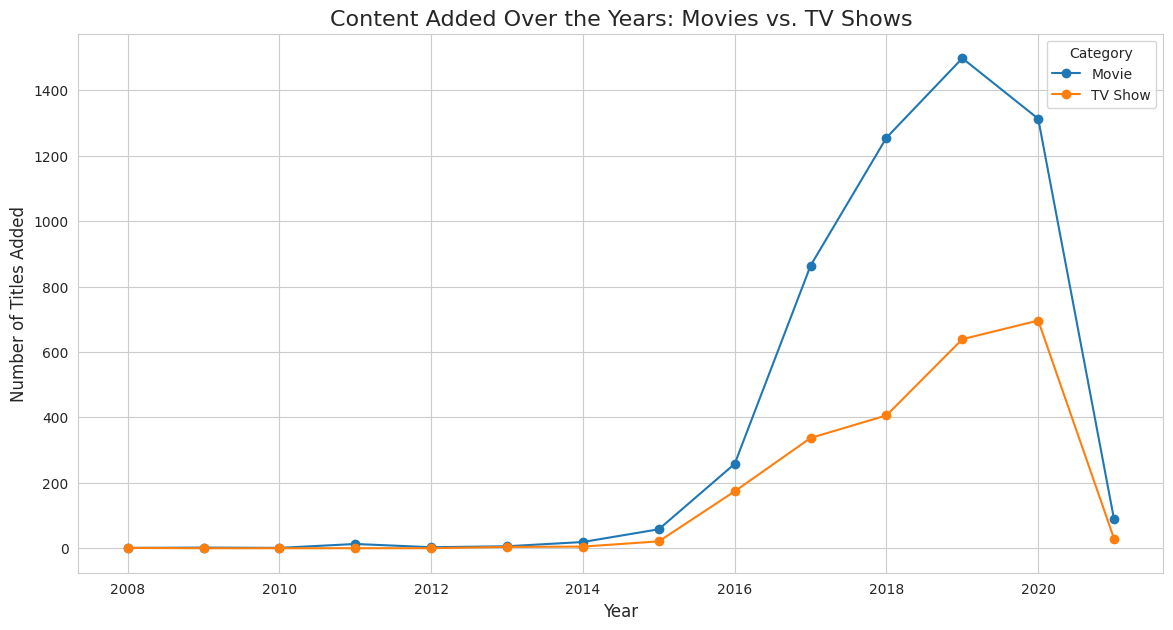

In [16]:
# Set the style for our plots
sns.set_style("whitegrid")

plt.figure(figsize=(12, 6))

# Group data by year and category (Movie/TV Show) and count the number of titles
yearly_counts = df.groupby('release_year')['Category'].value_counts().unstack().fillna(0)

# Create a line plot
yearly_counts.plot(kind='line', figsize=(14, 7), marker='o')

plt.title('Content Added Over the Years: Movies vs. TV Shows', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Titles Added', fontsize=12)
plt.legend(title='Category')
plt.grid(True)
plt.show()

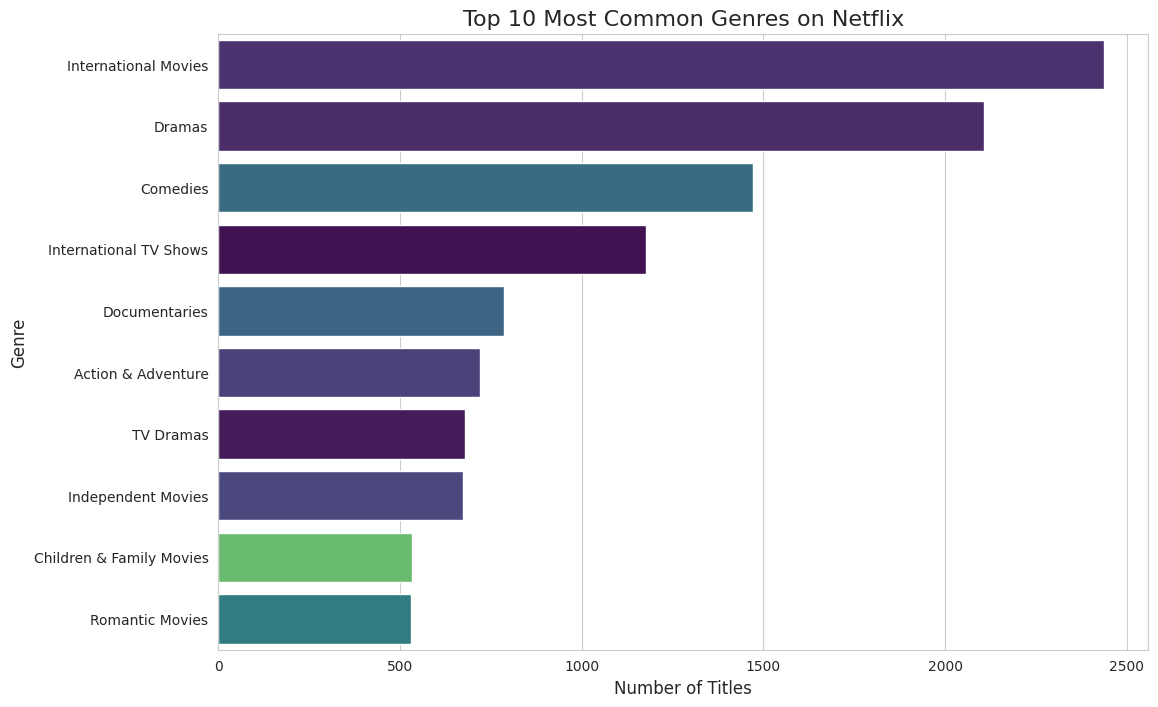

In [18]:
# The 'Type' column has comma-separated genres. We'll split them.
# 'explode()' creates a new row for each genre.
genres = df['Type'].str.split(', ').explode()

plt.figure(figsize=(12, 8))

# Create a bar plot of the top 10 most common genres
sns.countplot(y=genres.reset_index(drop=True), order=genres.value_counts().index[:10], palette='viridis', hue=genres.reset_index(drop=True), legend=False)

plt.title('Top 10 Most Common Genres on Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()

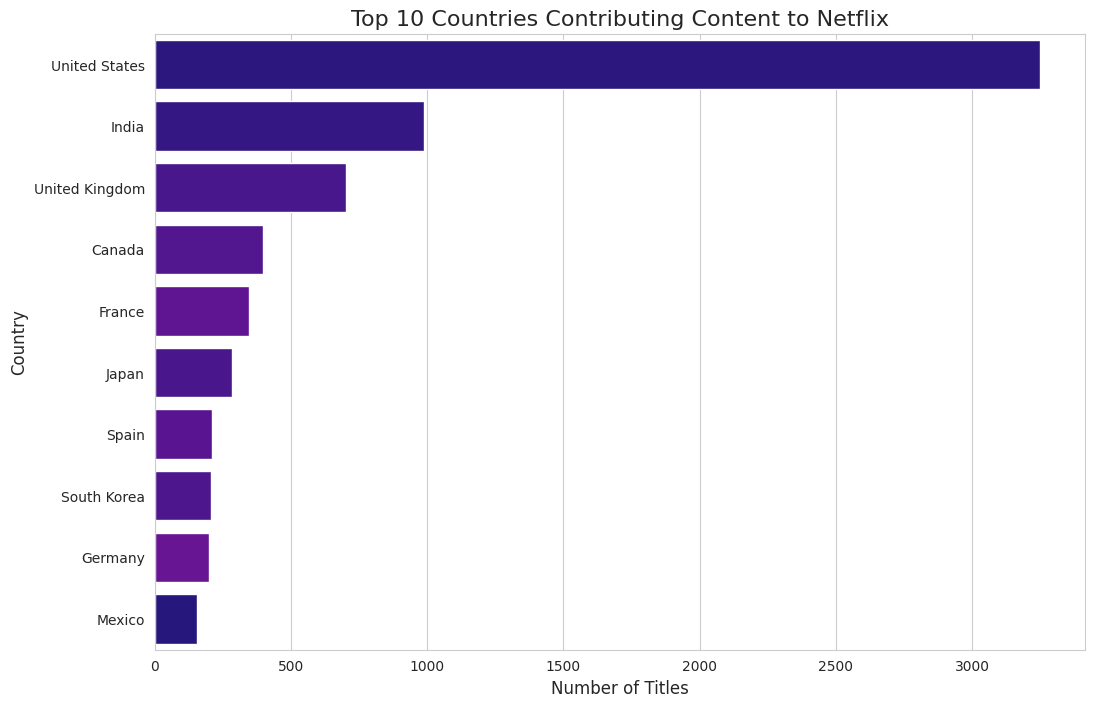

In [20]:
# Split and explode the 'Country' column, and drop any missing values
countries = df['Country'].dropna().str.split(', ').explode()

plt.figure(figsize=(12, 8))

# Create a bar plot of the top 10 content-producing countries
sns.countplot(y=countries.reset_index(drop=True), order=countries.value_counts().index[:10], palette='plasma', hue=countries.reset_index(drop=True), legend=False)

plt.title('Top 10 Countries Contributing Content to Netflix', fontsize=16)
plt.xlabel('Number of Titles', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.show()